<a href="https://colab.research.google.com/github/shabahmd/Machine-Learning-Notebooks/blob/main/IMDB_Movie_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
!unzip imdb-dataset-of-50k-movie-reviews.zip

Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [3]:
df = pd.read_csv("IMDB Dataset.csv")

In [4]:
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [6]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [7]:
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [8]:
df.duplicated().sum()

418

In [9]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk , re


In [10]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [11]:
import re
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')  # For tokenization
nltk.download('stopwords')  # For removing stopwords
nltk.download('wordnet')  # For lemmatization
nltk.download('omw-1.4')  # Additional data for lemmatization

# Load your dataframe (assuming df has a column called 'text')
# df = pd.read_csv('your_file.csv')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function for text cleaning, tokenization, and normalization
def preprocess_text(text):
    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 3. Tokenize the text
    tokens = word_tokenize(text)

    # 4. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # 5. Lemmatization (you could also use stemming if preferred)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # 6. Combine tokens back into a single string
    clean_text = ' '.join(tokens)

    return clean_text

# Apply preprocessing to the 'text' column in the dataframe and create a new column 'clean_text'
df['clean_text'] = df['review'].apply(preprocess_text)

# Show the first few rows of the dataframe with original and cleaned text
print(df[['review', 'clean_text']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                          clean_text  
0  one reviewer mentioned watching oz episode you...  
1  wonderful little production br br filming tech...  
2  thought wonderful way spend time hot summer we...  
3  basically there family little boy jake think t...  
4  petter matteis love time money visually stunni...  


In [15]:
df


,review,sentiment,clean_text
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...
...,...,...,...
49995,I thought this movie did a down right good job...,positive,thought movie right good job wasnt creative or...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,negative,catholic taught parochial elementary school nu...
49998,I'm going to have to disagree with the previou...,negative,im going disagree previous comment side maltin...


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


X = df['clean_text']
y = df['sentiment']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,  stratify= y)

tfidf = TfidfVectorizer(max_features = 5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)





In [18]:
classifier = LogisticRegression()
classifier.fit(X_train_tfidf, y_train)

LogisticRegression()

In [19]:
y_pred = classifier.predict(X_test_tfidf)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f' Accuracy:{accuracy:.2f}')

 Accuracy:0.88


In [23]:
print('\n classification report:\n', classification_report(y_test, y_pred))


 classification report:
               precision    recall  f1-score   support

    negative       0.89      0.87      0.88      6250
    positive       0.87      0.90      0.88      6250

    accuracy                           0.88     12500
   macro avg       0.88      0.88      0.88     12500
weighted avg       0.88      0.88      0.88     12500



In [24]:
conf_matrix = confusion_matrix(y_test, y_pred)

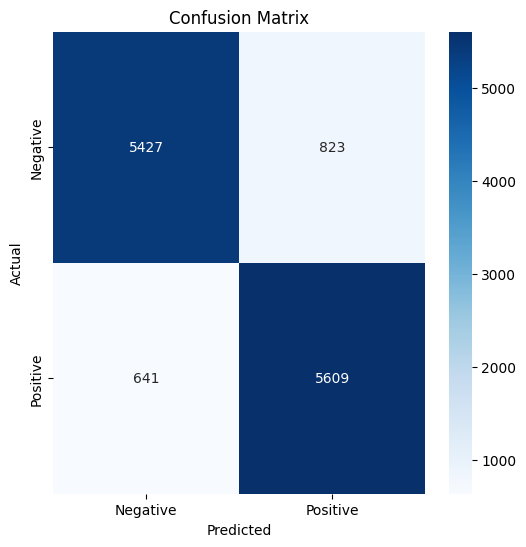

In [25]:
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [26]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import scipy.stats as stats

# Define the parameter distribution
param_dist = {
    'C': stats.uniform(0.01, 10),          # Continuous distribution between 0.01 and 10
    'penalty': ['l2'],                     # Regularization method
    'solver': ['lbfgs', 'liblinear']       # Solvers that work for smaller datasets
}

# Initialize the Logistic Regression model
lr = LogisticRegression(max_iter=1000)

# Initialize RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=lr, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, verbose=2)

# Fit the random search model
random_search.fit(X_train_tfidf, y_train)

# Get the best model and parameters
best_model = random_search.best_estimator_
print("Best Hyperparameters:\n", random_search.best_params_)

# Evaluate the model with the best parameters on the test data
y_pred = best_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters:
 {'C': 1.9049127798565257, 'penalty': 'l2', 'solver': 'lbfgs'}
              precision    recall  f1-score   support

    negative       0.89      0.87      0.88      6250
    positive       0.87      0.90      0.89      6250

    accuracy                           0.88     12500
   macro avg       0.88      0.88      0.88     12500
weighted avg       0.88      0.88      0.88     12500



In [27]:
accuracy = accuracy_score(y_test, y_pred)


In [29]:
accuracy *100

88.36

LTSM Keras Approach

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report


#load dataset

In [5]:
vocab_size = 10000
max_len = 200

(X_train, y_train), (X_test, y_test) =  imdb.load_data(num_words = vocab_size)


X_train = pad_sequences(X_train, maxlen= max_len)
X_test = pad_sequences(X_test, maxlen = max_len)



17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
model = Sequential()


model.add(Embedding(input_dim= vocab_size, output_dim = 128, input_length = max_len))

model.add(LSTM(129, dropout = 0.2, recurrent_dropout = 0.2))

model.add(Dense(64, activation ='relu'))

model.add(Dense(1,activation= 'sigmoid'))

model.compile(optimizer = Adam(), loss ="binary_crossentropy", metrics=['accuracy'])
batch_size = 128

epochs = 5

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Train the model

In [12]:
batch_size = 128

epochs = 10

history = model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs = epochs, batch_size = batch_size, verbose =2)


Epoch 1/10
196/196 - 89s - 455ms/step - accuracy: 0.9158 - loss: 0.2161 - val_accuracy: 0.8642 - val_loss: 0.3596
Epoch 2/10
196/196 - 139s - 708ms/step - accuracy: 0.9392 - loss: 0.1645 - val_accuracy: 0.8573 - val_loss: 0.3901
Epoch 3/10
196/196 - 144s - 735ms/step - accuracy: 0.9520 - loss: 0.1306 - val_accuracy: 0.8599 - val_loss: 0.4202
Epoch 4/10
196/196 - 85s - 435ms/step - accuracy: 0.9668 - loss: 0.0971 - val_accuracy: 0.8623 - val_loss: 0.4564
Epoch 5/10
196/196 - 142s - 723ms/step - accuracy: 0.9732 - loss: 0.0788 - val_accuracy: 0.8580 - val_loss: 0.5237
Epoch 6/10
196/196 - 139s - 710ms/step - accuracy: 0.9762 - loss: 0.0683 - val_accuracy: 0.8448 - val_loss: 0.5614
Epoch 7/10
196/196 - 144s - 733ms/step - accuracy: 0.9847 - loss: 0.0484 - val_accuracy: 0.8523 - val_loss: 0.6122
Epoch 8/10
196/196 - 144s - 736ms/step - accuracy: 0.9893 - loss: 0.0354 - val_accuracy: 0.8527 - val_loss: 0.6706
Epoch 9/10
196/196 - 139s - 707ms/step - accuracy: 0.9919 - loss: 0.0276 - val_acc

Evaluaten the model

In [13]:
y_pred = (model.predict(X_test)> 0.5).astype("int32")

782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 94ms/step


Classification report

In [14]:
print('\n Classification report : \n', classification_report(y_test, y_pred))



 Classification report : 
               precision    recall  f1-score   support

           0       0.81      0.88      0.85     12500
           1       0.87      0.80      0.83     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



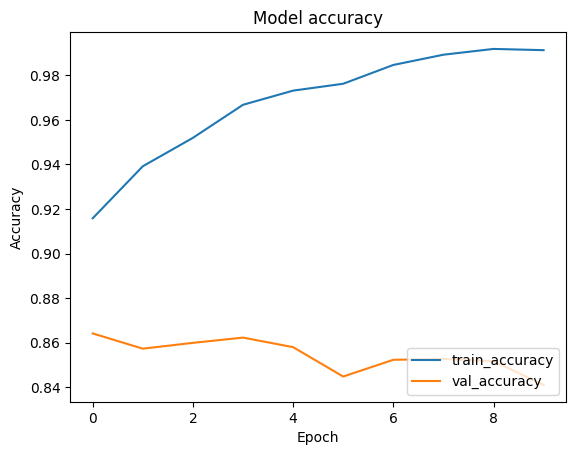

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()



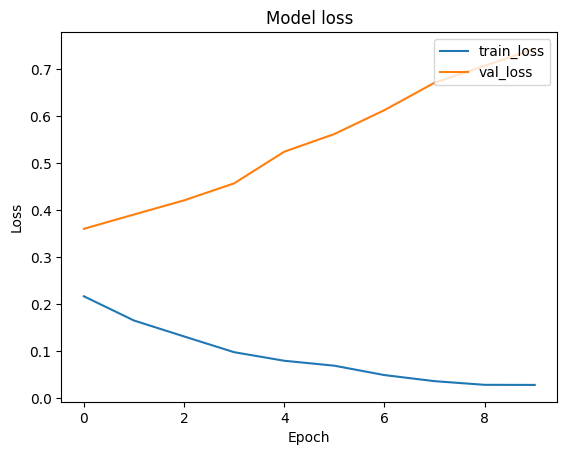

In [16]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()
